In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Gathering

In [2]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Preparation

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [6]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

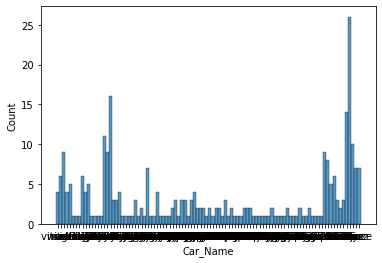

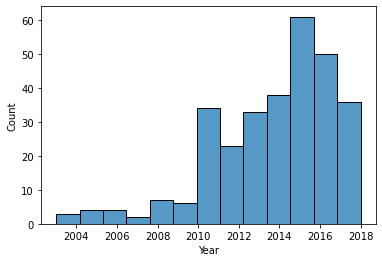

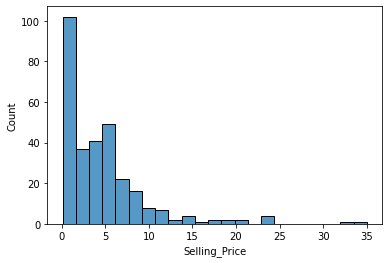

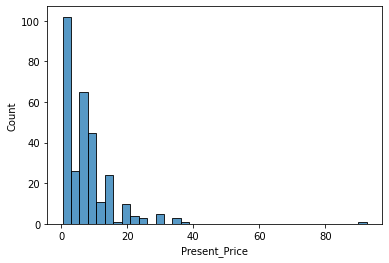

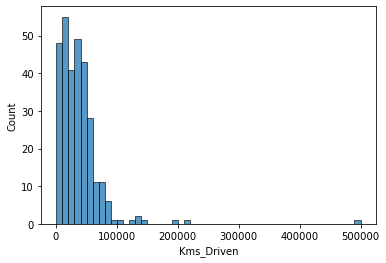

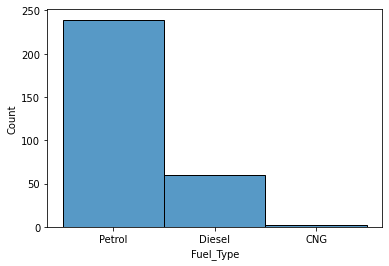

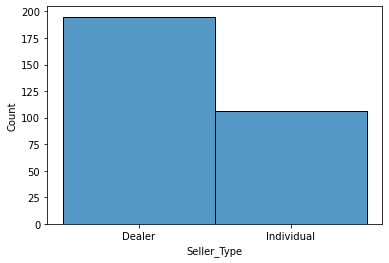

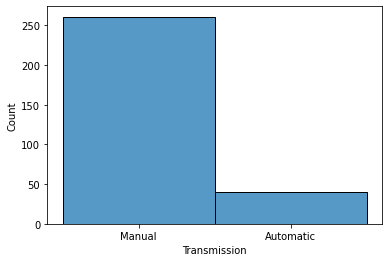

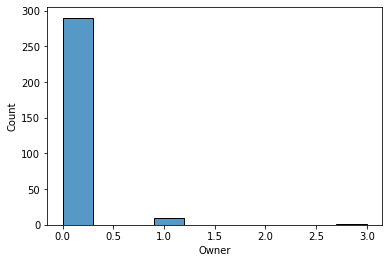

In [7]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

<AxesSubplot:>

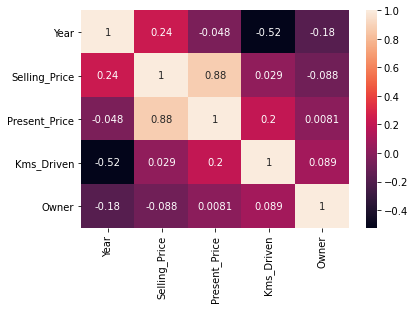

In [8]:
sns.heatmap(df.corr(), annot=True)

## Feature Engineering

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df["vehicle_age"] = 2021 - df.Year
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [11]:
df.drop(columns= ["Car_Name","Year"], inplace = True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [13]:
df = pd.get_dummies(df, columns = ["Fuel_Type", "Seller_Type", "Transmission"], drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Features and Label variable

In [14]:
X = df.drop("Selling_Price", axis=1)
y = df.Selling_Price

## Splitting Data into Training and Testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

## Model Building

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression(normalize=True) #normalize=True yazmamızın sebebi verileri scale-fit yapmak

In [18]:
model.fit(X_train,y_train)

LinearRegression(normalize=True)

## Interpret the model

In [19]:
model.coef_

array([ 4.45257970e-01, -1.87067298e-05, -8.13577578e-01, -3.19047765e-01,
        2.61924627e+00,  6.06486867e-01, -1.22016745e+00, -1.00868282e+00])

In [20]:
model.intercept_

4.604429051577007

In [21]:
print("Model intercept  : ", model.intercept_, "\n")
for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept  :  4.604429051577007 

Present_Price :  0.4452579698976293
Kms_Driven :  -1.8706729757021827e-05
Owner :  -0.8135775776586712
vehicle_age :  -0.31904776455888706
Fuel_Type_Diesel :  2.6192462729450825
Fuel_Type_Petrol :  0.6064868667913232
Seller_Type_Individual :  -1.2201674460429703
Transmission_Manual :  -1.008682821616272


In [22]:
coeff_df=pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Present_Price,0.445258
Kms_Driven,-0.000019
Owner,-0.813578
vehicle_age,-0.319048
Fuel_Type_Diesel,2.619246
Fuel_Type_Petrol,0.606487
Seller_Type_Individual,-1.220167
Transmission_Manual,-1.008683


## Model Evaluation

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([10.70729552, 10.87520713,  4.43096899,  5.91337788,  2.54941855,
        9.03674575,  7.2737809 ,  1.49360032, 16.02286635,  4.74188631,
        6.7140433 ,  6.40320371,  3.4644454 ,  3.4148824 , -0.60954639,
        4.17855023,  9.09429896, -0.30209302,  9.1878139 ,  1.18733586,
        7.5000935 , 18.19046601, 19.54269265,  0.21434982,  2.15321632,
        4.76671337,  4.95716413,  6.82822836,  5.23694236,  5.48340774,
        4.36427226,  7.93602233,  5.74539229, -0.54343788,  0.66628503,
        7.00623246,  7.3790224 ,  5.4235689 ,  1.17465734,  1.16263268,
        2.06339611,  5.1531104 , 14.03667284, -9.2787032 ,  1.39494051,
        3.97812269, -0.91681301,  8.44163201,  4.34565296,  4.84278586,
        5.18366168, 16.39104119,  0.85271469,  1.65187499,  1.6335204 ,
       -1.42292807,  2.85945813,  0.66521417, -1.75047375,  1.6120861 ,
        0.6862596 ])

In [26]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)

In [27]:
print("Model testing performance:")
print("--------------------------")
print('RMSE is: {}'.format(rmse))
print("MAE is: {}".format(mae))
print('R2 score is: {}'.format(R2_score)) 

Model testing performance:
--------------------------
RMSE is: 1.946054013887483
MAE is: 1.181176915707682
R2 score is: 0.8589039971923134


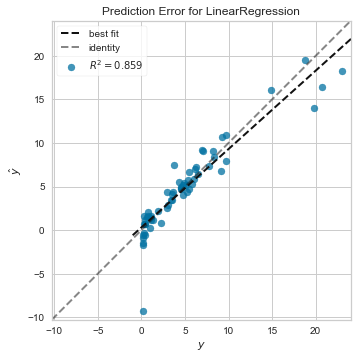

In [28]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [29]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_sample = results.head(25)
result_sample

,Actual,Predicted
67,9.25,10.707296
99,9.65,10.875207
266,3.65,4.430969
222,6.00,5.913378
24,2.90,2.549419
282,8.25,9.036746
279,6.25,7.273781
138,0.60,1.493600
50,14.90,16.022866
234,5.50,4.741886


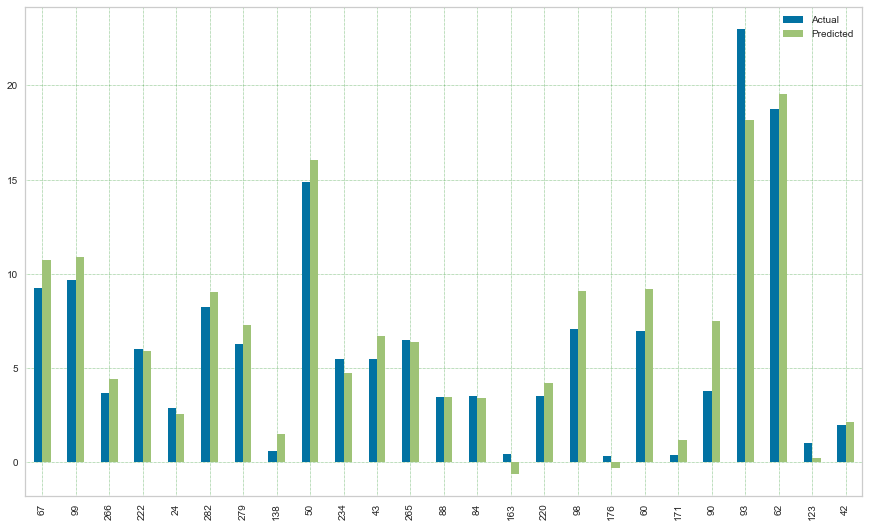

In [30]:
result_sample.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

## Model Persistence (Saving and Loading a Model)

In [31]:
from joblib import dump, load

In [32]:
dump(model, 'used_car_price_prediction.joblib') 

['used_car_price_prediction.joblib']

In [33]:
loaded_model = load('used_car_price_prediction.joblib')